# Classification model using KNNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload RNA data

In [2]:
path ='../../../Data_preprocessing/Prediction PFS/RNA+Clinic joined/Clinical_data_and_RNA_total_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,12.164384,1.374775,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,707.0,0.0,61.906849,1.374775,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361


In [3]:
X = data.iloc[:,28:43921  ] 
Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

X

,5S_rRNA,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,21.038652,35.199603,30.187983,22.999432,33.643965,37.130851,22.705126,22.869853,21.076515,21.271282,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,21.038652,38.183943,30.483638,25.581769,28.866645,37.945043,27.797609,24.142100,21.076515,21.271282,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,21.038652,37.141292,30.092851,26.933385,26.684228,36.851946,22.705126,30.406352,21.076515,21.271282,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,21.038652,36.447015,30.975010,26.683128,32.521495,38.453517,26.337846,28.229357,21.076515,21.271282,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,21.038652,37.623923,26.915750,22.999432,23.219176,38.931987,22.705126,22.869853,21.076515,21.271282,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,21.038043,36.338729,30.954407,27.310879,26.161567,38.376185,25.971821,24.438322,21.076088,21.056491,...,31.62442,30.78532,30.86517,30.92600,31.53239,23.65585,32.42073,34.41045,33.21697,32.22166
177,21.038043,38.248915,33.110149,26.793199,26.161567,36.537388,26.388265,24.438322,21.076088,21.056491,...,31.40147,31.50200,29.96535,30.21446,31.49627,28.04168,32.19568,32.69615,32.18970,32.59554
178,21.038043,35.884812,32.880283,25.659842,31.822942,38.265866,26.504307,24.438322,21.076088,21.056491,...,31.21094,30.91066,31.35764,30.99788,31.45772,23.65585,32.36832,35.02409,34.26388,32.82148
179,21.038043,35.283776,30.658715,27.533890,32.930512,36.882090,26.303147,24.438322,21.076088,21.056491,...,31.12324,28.76312,31.48891,30.27351,32.88316,23.65585,31.76924,34.07224,34.35116,31.98965


### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 6 and is: 0.5676


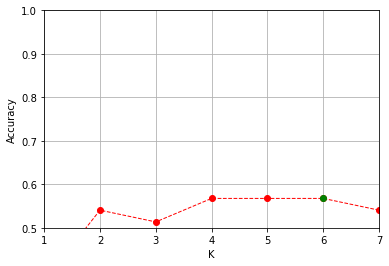

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x0000017E9E2AE160>,
                     n_neighbors=6)

### 6. Predictions

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,1,1


In [9]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters:0.48571428571428565
Best result of the cross validation of the model (manhattan) with the best paramters:0.5133004926108373


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 0.7083333333333334
Final accuracy on the testing dataset (manhattan): 0.6486486486486487


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[48 17]
 [25 54]]
Input data:  [0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0]
Prediction:        [0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1
 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70        65
           1       0.76      0.68      0.72        79

    accuracy                           0.71       144
   macro avg       0.71      0.71      0.71       144
weighted avg       0.71      0.71      0.71       144



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[13  7]
 [ 6 11]]
Input data:  [1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1]
Prediction:        [1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.61      0.65      0.63        17

    accuracy                           0.65        37
   macro avg       0.65      0.65      0.65        37
weighted avg       0.65      0.65      0.65        37



In [17]:
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,12.164384,1.374775,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,62.0,0.0,0.0,1.0,707.0,0.0,61.906849,1.374775,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361


### Everolimus test

In [21]:
path ='../../../Data_preprocessing\Testing with everolimus\RNA+Clinic joined\Clinical_data_and_RNA_total_Features_everolimus.csv'
data = pd.read_csv(path)

Y = [] # Target column
# For each entry I classified it by its PFS value.
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
data = data.iloc[:,28:43921  ] 


In [22]:
# Making predictions with the optimal model on the test dataset
yhatTest = manhattan_model.predict(data)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(Y),1) :
    if (yhatTest[i] == Y[i]):
        contTest = contTest + 1

print('Final accuracy on the testing dataset: ' + str(contTest/len(Y)))

Final accuracy on the testing dataset: 0.5923076923076923


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(Y)))
print('Prediction:        ' +str(yhatTest))


print(classification_report(Y, yhatTest))

----------------Confusion Matrix (Test)------------------
[[28 32]
 [21 49]]
Input data:  [1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0
 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0]
Prediction:        [1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1
 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0]
              precision    recall  f1-score   support

           0       0.57      0.47      0.51        60
           1       0.60      0.70      0.65        70

    accuracy                           0.59       130
   macro avg       0.59      0.58      0.58       130
weighted avg       0.59      0.59      0.59       130

